In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("/content/NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [5]:
df1=df.reset_index()['Close']


In [6]:
df1

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

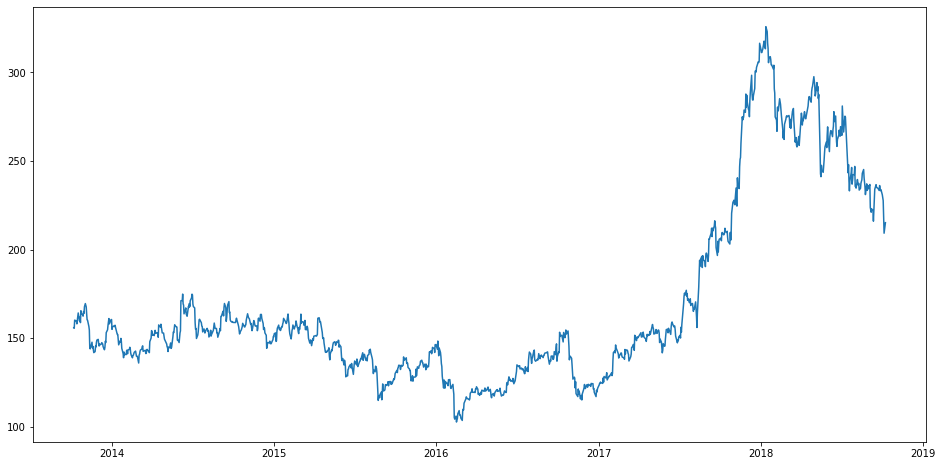

In [8]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

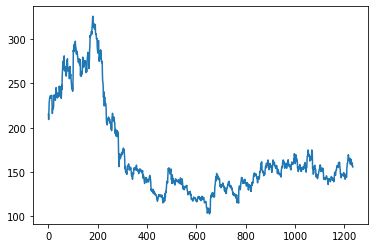

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 2s 209ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 2/100
11/11 [==============================] - 2s 206ms/step - loss: 0.0021 - val_loss: 8.8524e-04
Epoch 3/100
11/11 [==============================] - 2s 204ms/step - loss: 0.0020 - val_loss: 9.5429e-04
Epoch 4/100
11/11 [==============================] - 2s 202ms/step - loss: 0.0020 - val_loss: 9.1549e-04
Epoch 5/100
11/11 [==============================] - 2s 204ms/step - loss: 0.0019 - val_loss: 9.2226e-04
Epoch 6/100
11/11 [==============================] - 2s 204ms/step - loss: 0.0018 - val_loss: 9.0433e-04
Epoch 7/100
11/11 [==============================] - 2s 208ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 8/100
11/11 [==============================] - 2s 206ms/step - loss: 0.0018 - val_loss: 8.5031e-04
Epoch 9/100
11/11 [==============================] - 2s 208ms/step - loss: 0.0017 - val_loss: 7.6973e-04
Epoch 10/100
11/11 [==============================] - 2s 205ms/

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

177.97987142708908

In [25]:
math.sqrt(mean_squared_error(ytest,test_predict))

153.51016111752185

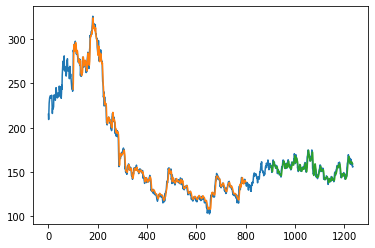

In [26]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()